In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import pickle
from sklearn.metrics import *
import pandas as pd

In [3]:
from dual_with_transfer_quantiles import dual_model_sudden, dual_model_gradual
from single_quantiles_with_transfer import model_sudden, model_gradual

In [20]:
# read fit values
fits_single = pickle.load(open('fit_single_transfer_loglik.pickle', 'rb'))
fits_dual = pickle.load(open('fit_dual_transfer_loglik.pickle', 'rb'))
fits_single_model_recovery = pickle.load(open('params/fit_single_bound_with_transfer_model_recovery.pickle', 'rb'))
fits_dual_model_recovery = pickle.load(open('params/fit_dual_bound_with_transfer_model_recovery.pickle', 'rb'))

curvatures_smooth = pickle.load(open('curvatures_smooth.pickle', 'rb'))
curvatures_smooth = curvatures_smooth/90.0
curvatures = pickle.load(open('curvatures.pickle', 'rb'))

In [12]:
def plot_data_vs_fits_dual(curvatures_smooth, Af, Bf, As, Bs):
    plt.figure(figsize = (20, 10))
    errors_predict = np.zeros((60, 704))
    fast = np.zeros((60, 704))
    slow = np.zeros((60, 704))
    rotation_est = np.zeros((60, 704))
    corr_coef = np.zeros(60)
    for participant in range(60):
        if participant % 4 == 0 or participant%4 == 1:
            errors_predict[participant], rotation_est[participant], fast[participant], slow[participant] = dual_model_sudden(704, Af[participant], Bf[participant], As[participant], Bs[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]
        else:    
            errors_predict[participant], rotation_est[participant], fast[participant], slow[participant] = dual_model_gradual(704, Af[participant], Bf[participant], As[participant], Bs[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]

    fig, ax = plt.subplots(4, dpi = 300, sharex = True, constrained_layout = True, figsize = (25, 15))
    plt.setp(ax, ylim=(-1, 2))
    legend_size = 15
    for participant in range(4):
        if participant%4 == 0  or participant%4 == 1:
            #plt.plot(np.nanmean(errors_predict[participant::4], axis = 0))
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l2, = ax[participant].plot(np.nanmean(fast[participant::4], axis = 0))
            l3, = ax[participant].plot(np.nanmean(slow[participant::4], axis = 0))
            l4, = ax[participant].plot(np.append(np.ravel(np.nanmean(1 - curvatures_smooth[participant::4], axis = 0)[1:-1]), np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l2, l3, l4], ['Rotation Est', 'Fast Est', 'Slow Est', 'Rotation Est Data'], prop={'size': legend_size})
        else:
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l2, = ax[participant].plot(np.nanmean(fast[participant::4], axis = 0))
            l3, = ax[participant].plot(np.nanmean(slow[participant::4], axis = 0))
            cs = np.zeros((704))
            csm = np.nanmean(curvatures_smooth[participant::4], axis = 0)
            for i in range(9):
                cs[i*64:(i+1)*64] = (i+1)*10/90.0 - csm[i+1]
            cs[576:640] = 1 - csm[10]
            cs[640:] = csm[11]
            l4, = ax[participant].plot(cs)
            #plt.plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), -np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l2, l3, l4], ['Rotation Est', 'Fast Est', 'Slow Est', 'Rotation Est Data'], prop = {'size' : legend_size})


        ax[participant].plot(np.zeros(704), color = 'black')
        ax[0].set_ylabel('Sudden \n Speed', fontsize = 15)
        ax[1].set_ylabel('Sudden \n Accuracy', fontsize = 15)
        ax[2].set_ylabel('Gradual \n Speed', fontsize = 15)
        ax[3].set_ylabel('Gradual \n Accuracy', fontsize = 15)
    fig.suptitle('Dual Model Predictions', fontsize = 20)
    return corr_coef


array([ 0.56213624,  0.81515812,  0.67666243,  0.80113185,  0.53491103,
        0.66516389,  0.86368506,  0.86853987,  0.55517297,  0.73915893,
        0.789499  ,  0.83871469,  0.77241369,  0.80308061,  0.7064957 ,
        0.85886003, -0.08293581,  0.72679807,  0.68086824,  0.76655801,
        0.83997305,  0.90432495,  0.3445808 ,  0.66007125,  0.46474993,
        0.86709626,  0.53432035,  0.75082052,  0.47928234,  0.81386325,
        0.79413679,  0.91448836, -0.11135059,  0.76041797,  0.83864054,
        0.8252865 ,  0.69170329,  0.62008112,  0.74765005,  0.88904429,
        0.9570747 ,  0.71916075,  0.38107454,  0.70983833,  0.75877578,
        0.79393742,  0.62350091,  0.86732632,  0.3523793 ,  0.71553953,
        0.69082483,  0.56440688,  0.6739142 ,  0.38513347,  0.41660948,
        0.78445357,  0.48991089,  0.62292604,  0.68404838,  0.714834  ])

<Figure size 1440x720 with 0 Axes>

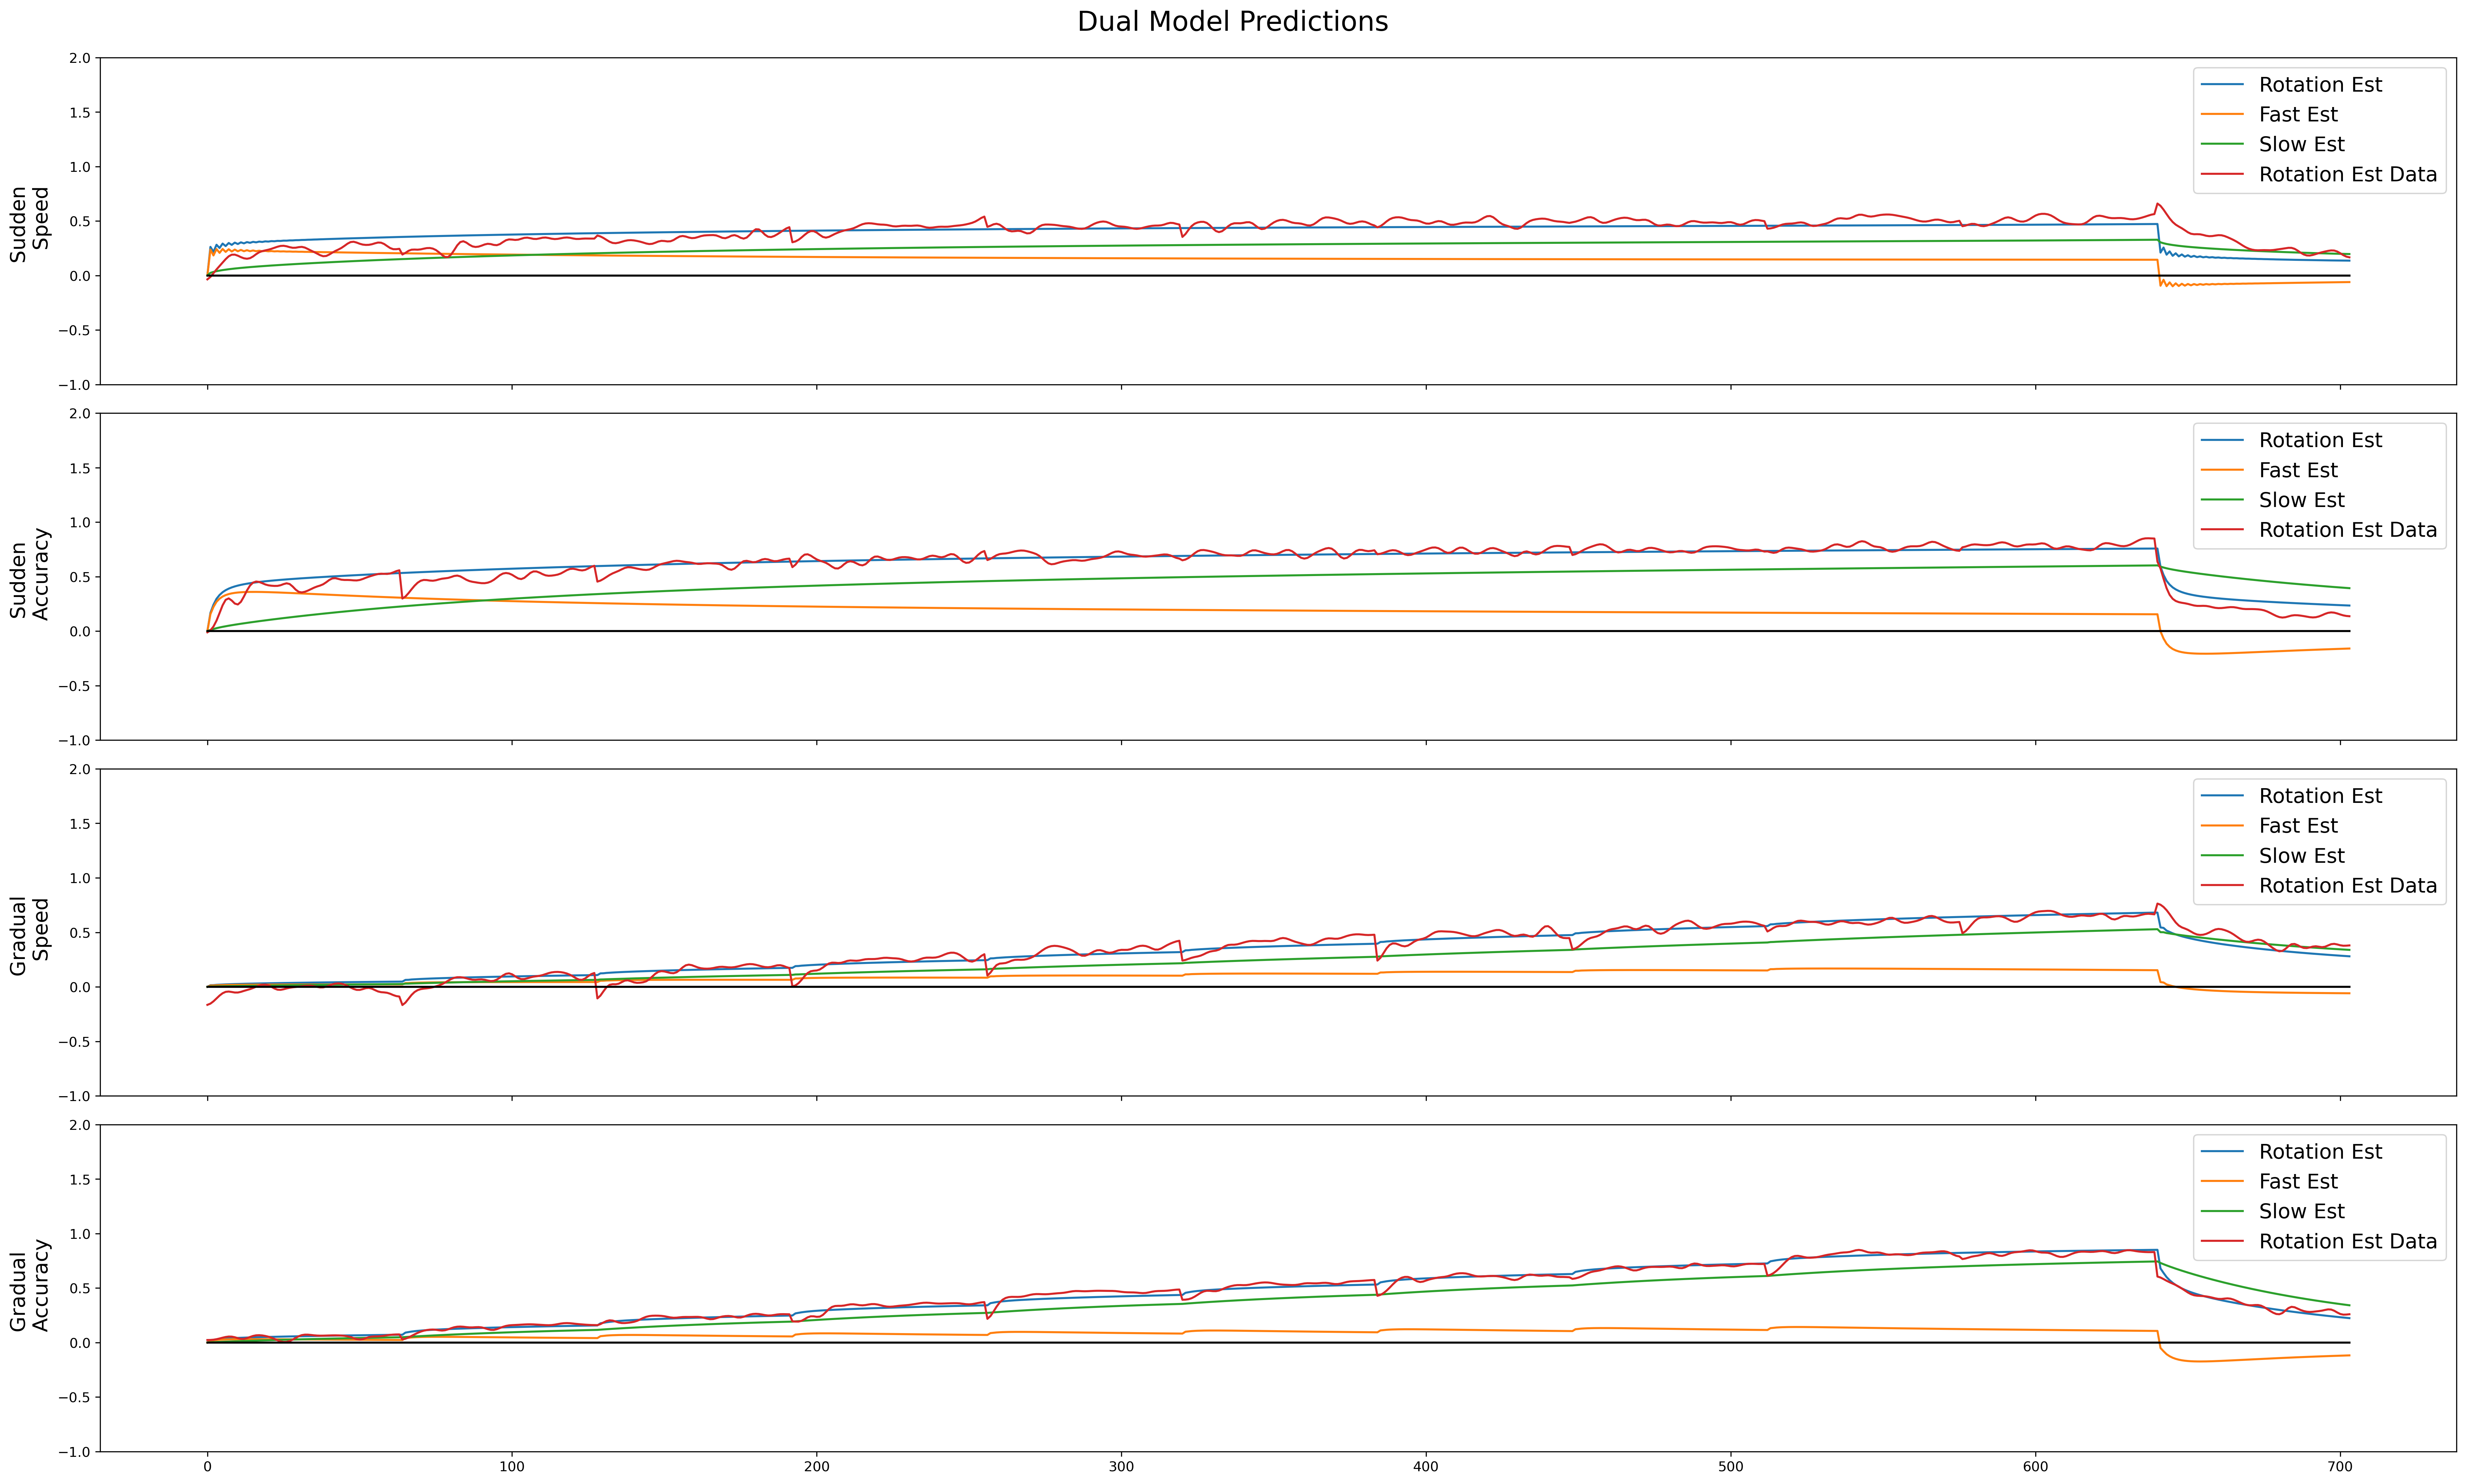

In [13]:
plot_data_vs_fits_dual(curvatures_smooth, fits_dual[:, 0], fits_dual[:, 1], fits_dual[:, 2], fits_dual[:, 3])

In [14]:
def plot_data_vs_fits_single(curvatures_smooth, A, B):
    plt.figure(figsize = (20, 10))
    errors_predict = np.zeros((60, 704))
    fast = np.zeros((60, 704))
    slow = np.zeros((60, 704))
    rotation_est = np.zeros((60, 704))
    corr_coef = np.zeros(60)
    for participant in range(60):
        if participant % 4 == 0 or participant%4 == 1:
            errors_predict[participant], rotation_est[participant] = model_sudden(704, A[participant], B[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]
        else:    
            errors_predict[participant], rotation_est[participant] = model_gradual(704, A[participant], B[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]

    fig, ax = plt.subplots(4, dpi = 300, sharex = True, constrained_layout = True, figsize = (25, 15))
    plt.setp(ax, ylim=(-1, 2))
    legend_size = 15
    
    for participant in range(4):
        if participant%4 == 0  or participant%4 == 1:
            #plt.plot(np.nanmean(errors_predict[participant::4], axis = 0))
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l4, = ax[participant].plot(np.append(np.ravel(np.nanmean(1 - curvatures_smooth[participant::4], axis = 0)[1:-1]), np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l4], ['Rotation Est', 'Rotation Est Data'], prop={'size': legend_size})
        else:
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            cs = np.zeros((704))
            csm = np.nanmean(curvatures_smooth[participant::4], axis = 0)
            for i in range(9):
                cs[i*64:(i+1)*64] = (i+1)*10/90.0 - csm[i+1]
            cs[576:640] = 1 - csm[10]
            cs[640:] = csm[11]
            l4, = ax[participant].plot(cs)
            #plt.plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), -np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l4], ['Rotation Est', 'Rotation Est Data'], prop = {'size' : legend_size})


        ax[participant].plot(np.zeros(704), color = 'black')
        ax[0].set_ylabel('Sudden \n Speed', fontsize = 15)
        ax[1].set_ylabel('Sudden \n Accuracy', fontsize = 15)
        ax[2].set_ylabel('Gradual \n Speed', fontsize = 15)
        ax[3].set_ylabel('Gradual \n Accuracy', fontsize = 15)
    fig.suptitle('Single state model predictions', fontsize = 20)
    return corr_coef


array([0.53731831, 0.80207645, 0.72471056, 0.78672404, 0.54040362,
       0.62164878, 0.79194566, 0.86096031, 0.172344  , 0.62399683,
       0.7885509 , 0.8255987 , 0.7806719 , 0.83163755, 0.84485298,
       0.83012012, 0.13557076, 0.65807515, 0.68226548, 0.75692243,
       0.79312938, 0.86881269, 0.35143838, 0.62026772, 0.47857565,
       0.74909073, 0.51641913, 0.74995665, 0.49179309, 0.8166975 ,
       0.79476586, 0.89342297, 0.59908819, 0.74035633, 0.83843058,
       0.77109058, 0.63079472, 0.48384916, 0.74783211, 0.87799103,
       0.95734592, 0.53191168, 0.31939288, 0.68888232, 0.84504447,
       0.79372868, 0.85891169, 0.85484982, 0.73463944, 0.58950006,
       0.69245481, 0.56087272, 0.48560473, 0.34355125, 0.37146975,
       0.74206523, 0.66286771, 0.46856388, 0.70944877, 0.64429909])

<Figure size 1440x720 with 0 Axes>

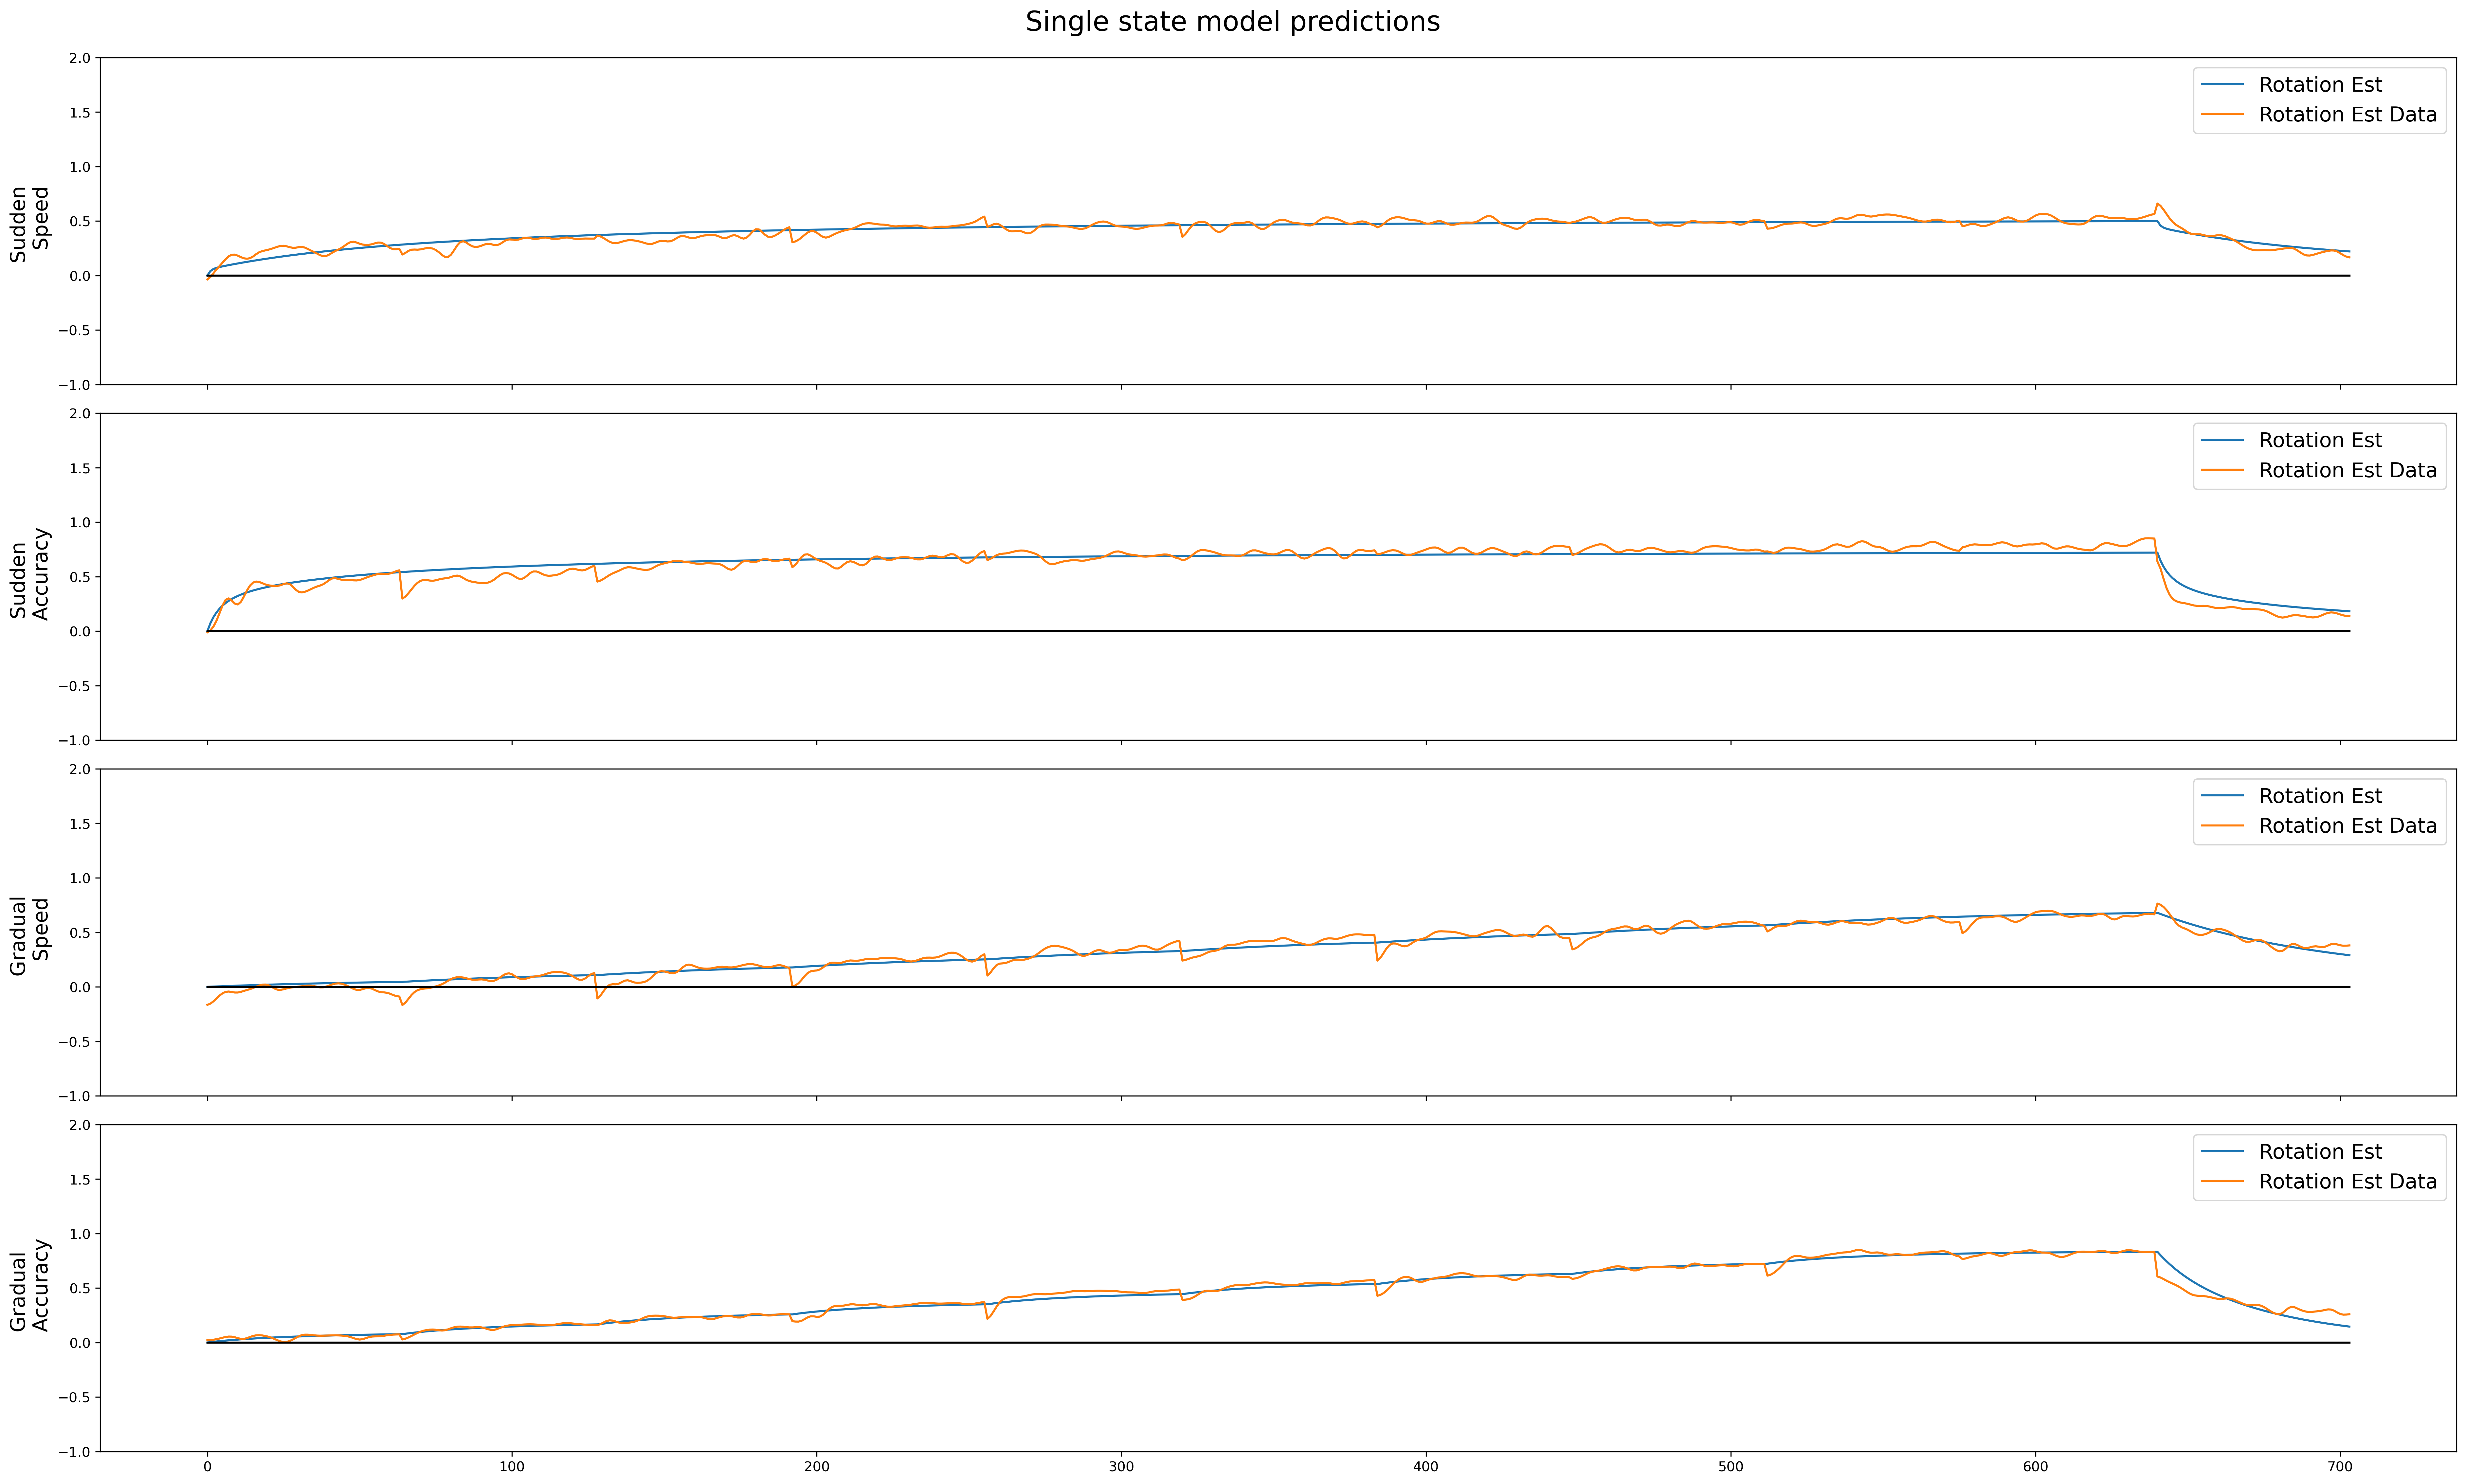

In [15]:
plot_data_vs_fits_single(curvatures_smooth, fits_single[:, 0], fits_single[:, 1])

Text(0, 0.5, 'Mean rmse')

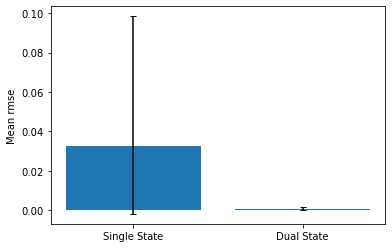

In [13]:
ci_single = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_single_model_recovery[0::4, -1]), scale=stat.sem(fits_single_model_recovery[0::4, -1]))
ci_dual = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_dual_model_recovery[:, -1]), scale=stat.sem(fits_dual_model_recovery[:, -1]))
plt.bar(('Single State', "Dual State"), [np.mean(fits_single_model_recovery[:, -1]), np.mean(fits_dual_model_recovery[:, -1])], yerr = ([ci_single[0], ci_dual[0]], [ci_single[1], ci_dual[1]]), capsize = 3)
plt.ylabel('Mean rmse')

In [310]:
-sum(fits_dual[3::4, -1] + fits_single[3::4, -1])

50833.0549296277

In [302]:
stat.chi2.sf(sum(fits_dual[:, -1]) - sum(fits_single[:, -1]), 30)

4.365596295449459e-280

In [21]:
model_errors_dual = np.zeros((60, 704))
model_errors_single = np.zeros((60, 704))
for participant in range(60):
    if participant%4 == 0 or participant%4 == 1:
        model_errors_dual[participant] = dual_model_sudden(704, fits_dual[participant][0], fits_dual[participant][1], fits_dual[participant][2], fits_dual[participant][3])[0]
        model_errors_single[participant] = model_sudden(704, fits_single[participant][0], fits_single[participant][1])[0]

    else:
        model_errors_dual[participant] = dual_model_gradual(704, fits_dual[participant][0], fits_dual[participant][1], fits_dual[participant][2], fits_dual[participant][3])[0]
        model_errors_single[participant] = model_gradual(704, fits_single[participant][0], fits_single[participant][1])[0]
        

In [59]:
pval_dual = np.zeros(60)
pval_single = np.zeros(60)
G = np.zeros(60)
for participant in range(60):
    G[participant] = fits_dual[participant, -1] - fits_single[participant, -1]
    if G[participant] > 0:
        pval_single[participant] = stat.chi2.sf(G[participant], 2)
    else:
        pval_dual[participant] = stat.chi2.sf(-G[participant], 2)

In [60]:
np.sum(pval_dual[np.nonzero(pval_dual)] < 0.05/60)

34

In [19]:
np.sum(pval_single[np.nonzero(pval_single[2::4])[0]] < 0.05/60)

5

In [220]:
sum(np.nonzero(pval_dual[np.nonzero(pval_dual)] < 0.05/60)[0]%4 == 3)

3

In [61]:
np.sum(pval_dual[np.where(pval_dual > 0)[0][np.where(pval_dual > 0)[0]%4 == 3]] < 0.05/60)

14

In [63]:
mse_dual_groups = np.zeros(4)
mse_single_groups = np.zeros(4)
mse_dual_groups_recovery = np.zeros(4)
mse_single_groups_recovery = np.zeros(4)

for group in range(4):
    mse_dual_groups[group] = mean_squared_error(np.ravel(model_errors_dual[group::4, 640:]), np.ravel(curvatures_smooth[group::4,-1]))
    mse_dual_groups_recovery[group] = mean_squared_error(np.ravel(model_errors_single[group::4]), np.ravel(model_errors_dual_recovery[group::4]))
    
    mse_single_groups[group] = mean_squared_error(np.ravel(model_errors_single[group::4, 640:]), np.ravel(curvatures_smooth[group::4,-1]))
    mse_single_groups_recovery[group] = mean_squared_error(np.ravel(model_errors_dual[group::4]), np.ravel(model_errors_single_recovery[group::4]))
    
mse_duals = mean_squared_error(np.ravel(model_errors_dual[:, 640:]), np.ravel(curvatures_smooth[:, -1]))
mse_singles = mean_squared_error(np.ravel(model_errors_single[:, 640:]), np.ravel(curvatures_smooth[:, -1]))


In [85]:
AIC_single = np.zeros((4, 15))
BIC_single = np.zeros((4, 15))
AIC_dual = np.zeros((4, 15))
BIC_dual = np.zeros((4, 15))

mse_dual = np.zeros(60)
mse_single = np.zeros(60)


rss_dual = np.sum(model_errors_dual[:, :640] - np.reshape(curvatures_smooth[:, 1:-1], (60, 640)), axis = 1)**2
rss_single = np.sum(model_errors_single[:, :640] - np.reshape(curvatures_smooth[:, 1:-1], (60, 640)), axis = 1)**2

for group in range(4):
    AIC_dual[group] = 2*4 + 2*fits_dual[group::4, -1]
    BIC_dual[group] = np.log(704)*4 + fits_dual[group::4, -1]


    AIC_single[group]  = 2*2 + 2*fits_single[group::4, -1]
    BIC_single[group] = np.log(704)*2 + np.log(fits_single[group::4, -1])


In [91]:
np.sum(AIC_dual[3] < AIC_single[3])

7

In [49]:
np.sum(AIC_dual < AIC_single)

23

In [76]:
sum(fits_dual[:, -1])

738.2327615786689

In [77]:
sum(fits_single[:, -1])

826.2765964411491

In [46]:
np.shape(curvatures_smooth[:, -1])

(60, 64)

In [49]:
fits_single[48, -1]

50.24349663838527

In [29]:
r2_score(np.ravel(model_errors_dual), np.ravel(curvatures_smooth[:, 1:]))

-1.8435942015295161

In [30]:
r2_score(np.ravel(model_errors_single), np.ravel(curvatures_smooth[:, 1:]))

-1.7878687798910495

In [61]:
from scipy.ndimage import gaussian_filter1d
curvatures_smooth = gaussian_filter1d(curvatures, sigma = 2)
pickle.dump(curvatures_smooth, open('curvatures_smooth.pickle', 'wb'))

In [312]:
pval_dual.nonzero()

(array([ 0,  2,  4, 10, 13, 14, 16, 18, 24, 27, 28, 29, 30, 32, 34, 38, 40,
        42, 44, 45, 46, 48, 56, 58], dtype=int64),)

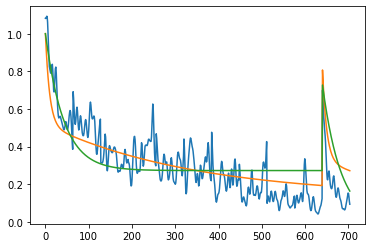

In [58]:
participant = 25
plt.plot(np.ravel(curvatures_smooth[participant][1:]))
plt.plot(model_errors_dual[participant])
plt.plot(model_errors_single[participant])

In [47]:
fits_dual[0, 5]

10.503401873917536

In [49]:
fits_single[0, 3]

-82.73038327528457

93.2337851492021